<a href="https://colab.research.google.com/github/PerdikosFilippos/Disease-Image-Classification-Agriculture-/blob/main/Disease_Image_Classification_(Agriculture).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

#Create dataset

In [39]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/Plantvillage',
    shuffle=True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE

)

Found 1906 files belonging to 3 classes.


Check dataset classes

In [40]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

Take a look at the images

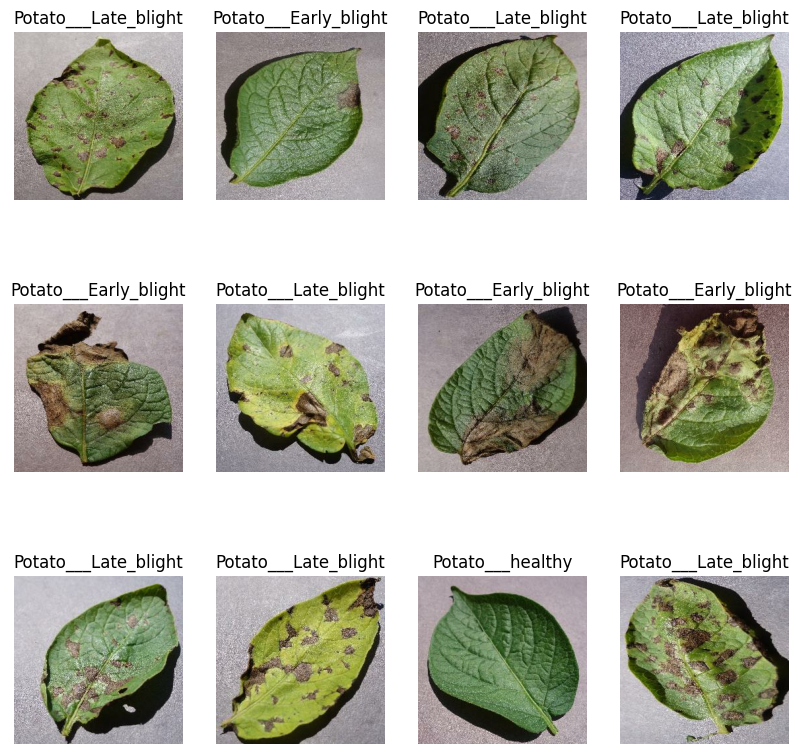

In [41]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
  for i in range(12):
    ax = plt.subplot(3,4,i+1)
    plt.imshow(image_batch[i].numpy().astype('uint8'))
    plt.title(class_names[label_batch[i]])
    plt.axis('off')

#Split data into train - test

80% = Training,    20% = Test (10%) + Validation (10%)

In [42]:
#What is 80% of the dataset?

train_size = 0.8
len(dataset)*0.8

48.0

In [43]:
train_ds = dataset.take(51)
len(train_ds)

51

In [44]:
test_ds = dataset.skip(54)
len(test_ds)

6

In [45]:
val_size = 0.1
len(dataset)*val_size

6.0

In [46]:
val_ds = test_ds.skip(6)
len(val_ds)

0

In [47]:
test_ds = test_ds.skip(4)
len(test_ds)

2

MAKE THE DEF TO GET IT

In [48]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):

  ds_size = len(ds)

  if shuffle:
    ds = ds.shuffle(shuffle_size, seed=12)

  train_size = int(train_split * ds_size)
  val_size = int(val_split * ds_size)

  train_ds = ds.take(train_size)

  val_ds = ds.skip(train_size).take(val_size)
  test_ds = ds.skip(train_size).skip(val_size)

  return train_ds, val_ds, test_ds

In [49]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [50]:
len(train_ds)

48

In [51]:
len(test_ds)

6

In [52]:
len(val_ds)

6

Caching for performance optimisation during training

In [53]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

Resize, Rescale and Data Augmentation

In [54]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [55]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical'),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

#Building CNN Model

In [56]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

Check Model:

In [57]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_3 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d_6 (Conv2D)           (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (32, 127, 127, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (32, 60, 60, 64)         

In [58]:
model.compile(
    optimizer='adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [59]:
history = model.fit(
    train_ds,
    epochs = EPOCHS,
    batch_size = BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/50
48/48 [==============================] - 10s 96ms/step - loss: 0.9605 - accuracy: 0.4534 - val_loss: 0.9524 - val_accuracy: 0.4688
Epoch 2/50
48/48 [==============================] - 3s 56ms/step - loss: 0.8681 - accuracy: 0.5125 - val_loss: 0.7953 - val_accuracy: 0.5312
Epoch 3/50
48/48 [==============================] - 3s 58ms/step - loss: 0.5907 - accuracy: 0.7247 - val_loss: 0.5987 - val_accuracy: 0.7031
Epoch 4/50
48/48 [==============================] - 3s 57ms/step - loss: 0.4440 - accuracy: 0.8108 - val_loss: 0.4769 - val_accuracy: 0.7865
Epoch 5/50
48/48 [==============================] - 3s 55ms/step - loss: 0.3735 - accuracy: 0.8344 - val_loss: 0.3092 - val_accuracy: 0.8802
Epoch 6/50
48/48 [==============================] - 3s 56ms/step - loss: 0.3050 - accuracy: 0.8830 - val_loss: 0.2617 - val_accuracy: 0.8958
Epoch 7/50
48/48 [==============================] - 3s 58ms/step - loss: 0.2156 - accuracy: 0.9179 - val_loss: 0.1709 - val_accuracy: 0.9271
Epoch 8/50
4

Now test it with UNSEEN (test) data

In [60]:
scores = model.evaluate(test_ds)

6/6 [==============================] - 1s 29ms/step - loss: 0.0705 - accuracy: 0.9896


In [61]:
scores

[0.07047182321548462, 0.9895833134651184]

#Plotting Data

In [62]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

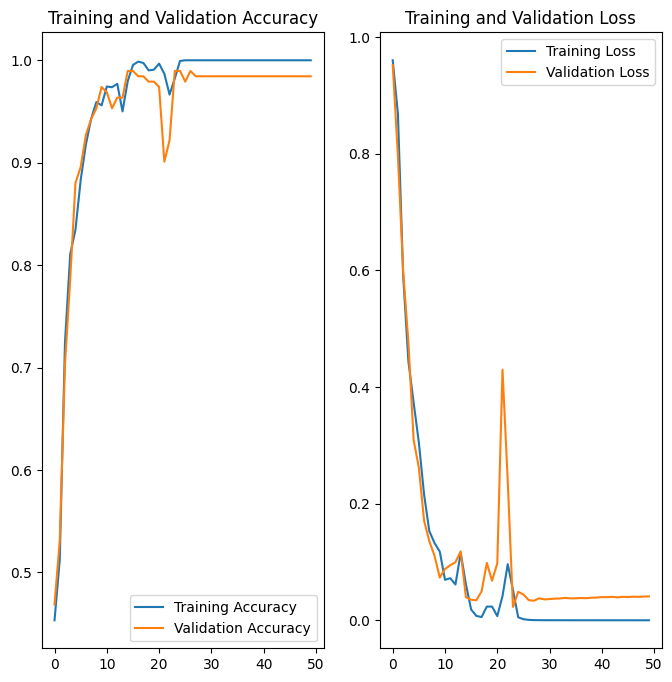

In [63]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#Run Prediction on a sample image!!

first image to predict
actual label: Potato___healthy
1/1 [==============================] - 0s 30ms/step
predicted label: Potato___healthy


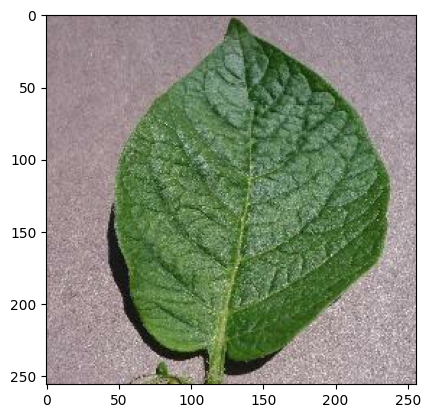

In [65]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):

    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()

    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])

    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

#Write a function for inference


In [66]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

#Now run inference on few sample images



1/1 [==============================] - 0s 18ms/step


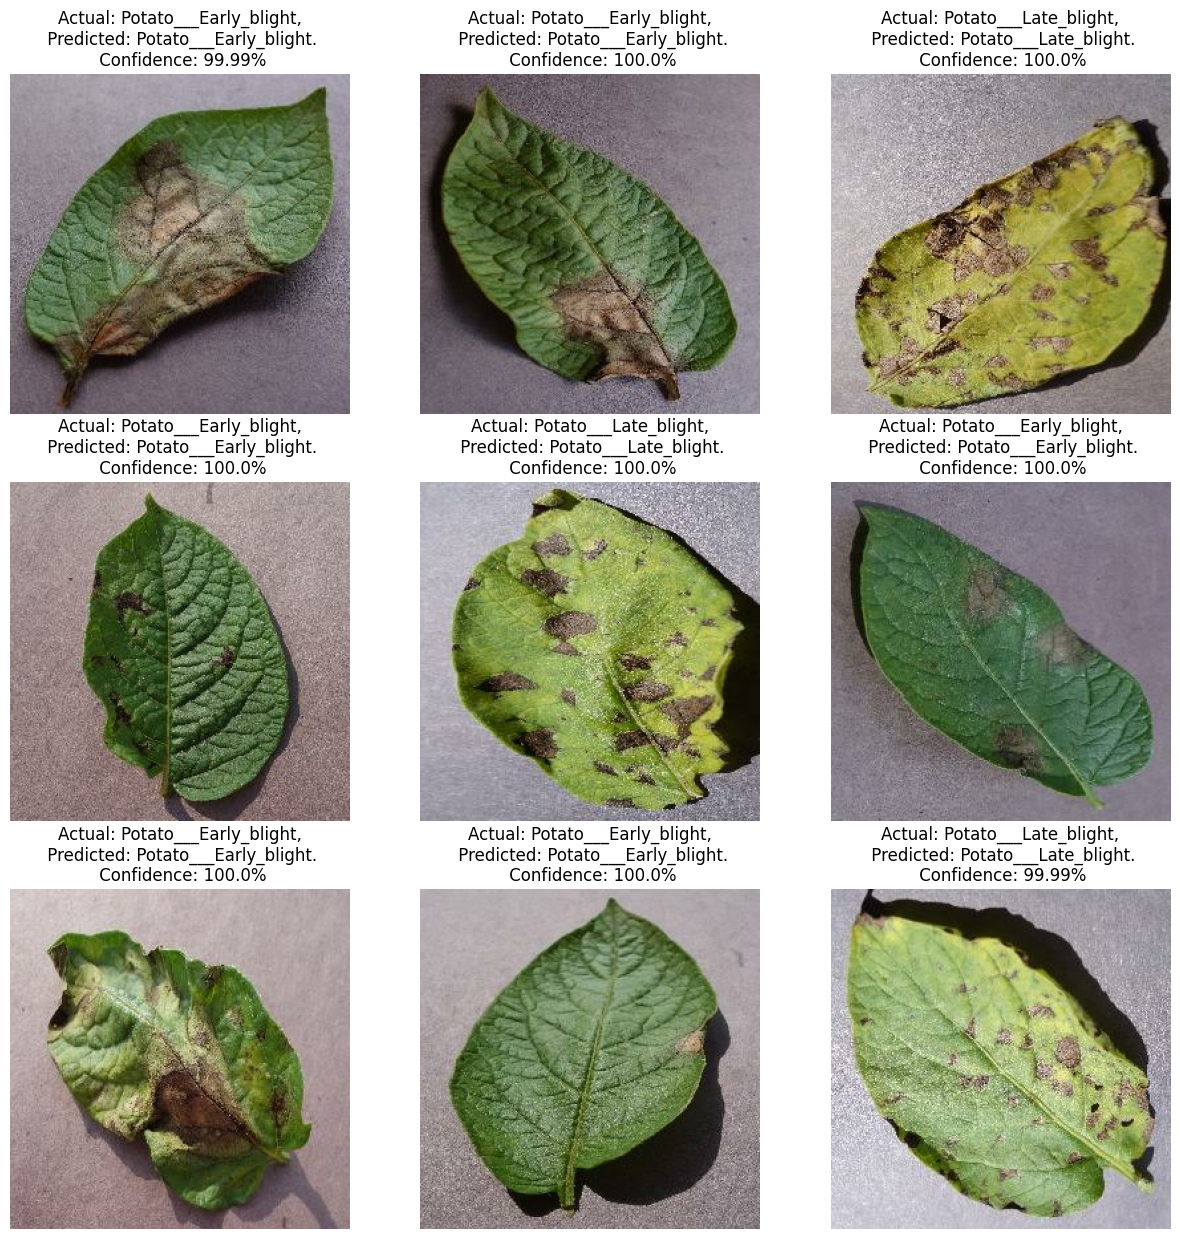

In [67]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")

#Save the model

In [68]:
import os
model_version=max([int(i) for i in os.listdir("../models") + [0]])+1
model.save(f"../models/{model_version}")

FileNotFoundError: [Errno 2] No such file or directory: '../models'

In [70]:
model.save("/content/Plantvillage/potatoes.h5")